In [0]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/INFO_290/ML_model

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/INFO_290/ML_model


In [0]:
!ls

1365_XRP_comments_and_submissions.csv  Ripple.csv
binance.csv			       wiki_views.csv
coinbase.csv			       XRP_coimetrics_data.csv
CoinBase.csv			       XRP_comments_and_submissions.csv
correlation.png			       XRP.csv
google_trendsxrp.csv		       XRP_historical_hourly_price.csv
ML_model.ipynb


In [0]:
wiki_views = pd.read_csv('wiki_views.csv') #wikipedia daily views
binance = pd.read_csv('binance.csv')  #google trends data
coinbase = pd.read_csv('coinbase.csv') #google trends data
Coinbase = pd.read_csv('CoinBase.csv')  #reddit subscribers
Ripple = pd.read_csv('Ripple.csv') #reddit subscribers
google_xrp = pd.read_csv('google_trendsxrp.csv') #google trends data
price = pd.read_csv('XRP_historical_hourly_price.csv') #cryptocompare price data (aggregate from different exchanges)
XRP_coimetrics_data = pd.read_csv('XRP_coimetrics_data.csv') #coinmetrics data
XRP = pd.read_csv('XRP.csv') #reddit subscribers

In [0]:
XRP_coimetrics_data

,Unnamed: 0,date,active_adress,FeeMeanXRP,FeeMedXRP,FeeTotXRP,PriceBTC,PriceUSD,ROI1yr,ROI30d,transactions_count,XRPAdj
0,1461,2017-01-01,1279,0.005988,0.000150,4999.385672,0.000006,0.006308,3.414060,-4.598658,834832,2467.130626
1,1462,2017-01-02,1633,0.007085,0.000150,6403.432368,0.000006,0.006270,5.867797,-4.066500,903815,2407.603861
2,1463,2017-01-03,1913,0.007513,0.000165,6292.742040,0.000006,0.006424,7.643177,-0.127838,837562,26.640669
3,1464,2017-01-04,1984,0.017283,0.000150,18423.908762,0.000006,0.006479,7.043325,1.578541,1066033,1147.530401
4,1465,2017-01-05,2436,0.028933,0.000150,33362.939893,0.000006,0.006193,4.284547,-7.867746,1153121,475.006288
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2649,2020-04-03,5383,0.000699,0.000012,617.033498,0.000027,0.179431,-45.829767,-23.484489,883075,134.533875
1189,2650,2020-04-04,4642,0.000542,0.000012,481.312322,0.000026,0.181335,-50.097362,-24.113112,888736,244.264233
1190,2651,2020-04-05,4430,0.000524,0.000012,461.155950,0.000026,0.179386,-49.177926,-26.569213,880811,408.263420
1191,2652,2020-04-06,5958,0.000671,0.000012,644.845275,0.000027,0.196956,-45.578377,-16.850623,961497,112.787252


In [0]:
price 

,Unnamed: 0,time,close,high,low,open,volumefrom,volumeto,date
0,0,1462719600,0.006384,0.006384,0.006354,0.006354,487.08,3.109,2016-05-08 15:00:00
1,1,1462723200,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 16:00:00
2,2,1462726800,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 17:00:00
3,3,1462730400,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 18:00:00
4,4,1462734000,0.006384,0.006384,0.006384,0.006384,0.00,0.000,2016-05-08 19:00:00
...,...,...,...,...,...,...,...,...,...
34012,34012,1585162800,0.160400,0.162100,0.160100,0.161100,17921777.75,2882707.200,2020-03-25 19:00:00
34013,34013,1585166400,0.159900,0.160700,0.159800,0.160400,10404868.38,1667164.580,2020-03-25 20:00:00
34014,34014,1585170000,0.159300,0.160200,0.158800,0.159900,9302164.24,1484368.710,2020-03-25 21:00:00
34015,34015,1585173600,0.161800,0.161900,0.159100,0.159300,13006764.14,2087781.200,2020-03-25 22:00:00


In [0]:
df = coinbase.merge(price[['date','close', 'volumefrom']],how='left',left_on=['date'],right_on=['date'])
df = df.drop('isPartial', axis=1) 
df = df.merge(binance[['date', 'Binance']], how= 'left' ,left_on=['date'],right_on=['date'] )
df = df.merge(google_xrp[['date', 'XRP']], how= 'left' ,left_on=['date'],right_on=['date'] )
df['CoinBase'] = df['Coinbase']

df = df.drop(['Coinbase'],axis=1)
df = df.drop(['day', 'hour','month','year'],axis=1)
df2 = df.copy()
df


,date,close,volumefrom,Binance,XRP,CoinBase
0,2017-01-01 00:00:00,0.006487,4342.13,0.0,37.0,22
1,2017-01-01 01:00:00,0.006498,3056.21,0.0,59.0,26
2,2017-01-01 02:00:00,0.006667,258.00,0.0,39.0,24
3,2017-01-01 03:00:00,0.006563,3194.77,0.0,47.0,24
4,2017-01-01 04:00:00,0.006597,4169.47,0.0,24.0,20
...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,0.190100,1835796.97,61.0,73.0,82
26276,2019-12-31 20:00:00,0.190200,2109093.29,58.0,71.0,75
26277,2019-12-31 21:00:00,0.190800,2267928.71,62.0,75.0,71
26278,2019-12-31 22:00:00,0.191900,2623716.02,55.0,70.0,74


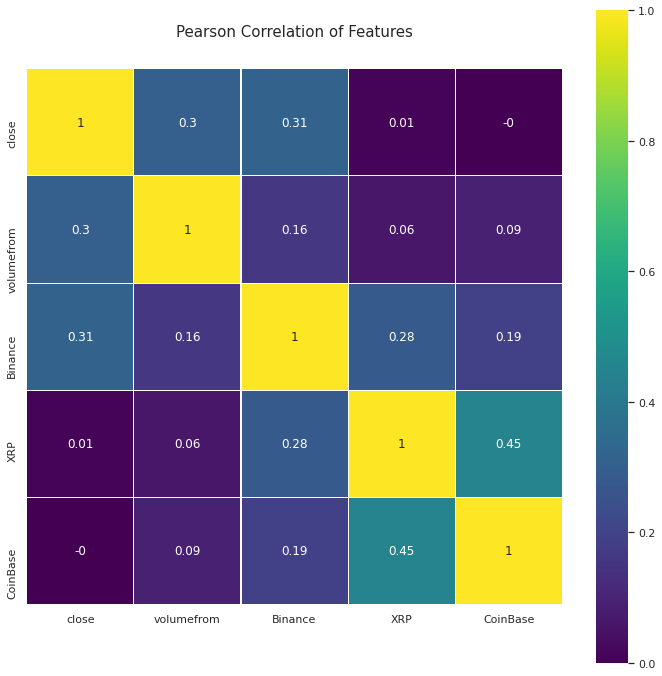

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

In [0]:
df['price_up'] = df['close']
df['price_up'][0] = 'NaN'
for i in range(1,len(df)):
  if df['close'][i]>df['close'][i-1]:
    df['price_up'][i]=int(1)
  else:
    df['price_up'][i]=int(0)

df

,date,close,volumefrom,Binance,XRP,CoinBase,price_up
0,2017-01-01 00:00:00,0.006487,4342.13,0.0,37.0,22,NaN
1,2017-01-01 01:00:00,0.006498,3056.21,0.0,59.0,26,1.0
2,2017-01-01 02:00:00,0.006667,258.00,0.0,39.0,24,1.0
3,2017-01-01 03:00:00,0.006563,3194.77,0.0,47.0,24,0.0
4,2017-01-01 04:00:00,0.006597,4169.47,0.0,24.0,20,1.0
...,...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,0.190100,1835796.97,61.0,73.0,82,1.0
26276,2019-12-31 20:00:00,0.190200,2109093.29,58.0,71.0,75,1.0
26277,2019-12-31 21:00:00,0.190800,2267928.71,62.0,75.0,71,1.0
26278,2019-12-31 22:00:00,0.191900,2623716.02,55.0,70.0,74,1.0


In [0]:
df['vol_norm']=(df['volumefrom']-df['volumefrom'].mean())/df['volumefrom'].std()


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        26280 non-null  object 
 1   close       26280 non-null  float64
 2   volumefrom  26280 non-null  float64
 3   Binance     24601 non-null  float64
 4   XRP         26113 non-null  float64
 5   CoinBase    26280 non-null  int64  
 6   price_up    26279 non-null  float64
 7   vol_norm    26280 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.1+ MB


In [0]:
df = df.fillna(df.mean())

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 0 to 26279
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        26280 non-null  object 
 1   close       26280 non-null  float64
 2   volumefrom  26280 non-null  float64
 3   Binance     26280 non-null  float64
 4   XRP         26280 non-null  float64
 5   CoinBase    26280 non-null  int64  
 6   price_up    26280 non-null  float64
 7   vol_norm    26280 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [0]:
df = df.drop(['volumefrom', 'date', 'close'], axis=1)
df['price_up'][0] = 0
df

,Binance,XRP,CoinBase,price_up,vol_norm
0,0.0,37.0,22,0.0,-0.612479
1,0.0,59.0,26,1.0,-0.612678
2,0.0,39.0,24,1.0,-0.613113
3,0.0,47.0,24,0.0,-0.612657
4,0.0,24.0,20,1.0,-0.612505
...,...,...,...,...,...
26275,61.0,73.0,82,1.0,-0.327837
26276,58.0,71.0,75,1.0,-0.285362
26277,62.0,75.0,71,1.0,-0.260676
26278,55.0,70.0,74,1.0,-0.205380


In [0]:
columns = df.drop('price_up',axis=1).columns
for col in columns:
  df[col]=(df[col]-df[col].mean())/df[col].std()
df

,Binance,XRP,CoinBase,price_up,vol_norm
0,-1.713145,-0.984707,-1.706920,0.0,-0.612479
1,-1.713145,0.178764,-1.492779,1.0,-0.612678
2,-1.713145,-0.878937,-1.599849,1.0,-0.613113
3,-1.713145,-0.455857,-1.599849,0.0,-0.612657
4,-1.713145,-1.672213,-1.813990,1.0,-0.612505
...,...,...,...,...,...
26275,0.602458,0.919154,1.505197,1.0,-0.327837
26276,0.488576,0.813384,1.130450,1.0,-0.285362
26277,0.640419,1.024924,0.916309,1.0,-0.260676
26278,0.374694,0.760499,1.076915,1.0,-0.205380


In [0]:
df['prev_price_up'] = df['price_up'].shift(+1)
df['price_up'] = df['price_up'].shift(-1)
df['price_up'][len(df)]= 0
df['prev_price_up'][0] = 0
df 

,Binance,XRP,CoinBase,price_up,vol_norm,prev_price_up
0,-1.713145,-0.984707,-1.706920,1.0,-0.612479,0.0
1,-1.713145,0.178764,-1.492779,1.0,-0.612678,0.0
2,-1.713145,-0.878937,-1.599849,0.0,-0.613113,1.0
3,-1.713145,-0.455857,-1.599849,1.0,-0.612657,1.0
4,-1.713145,-1.672213,-1.813990,1.0,-0.612505,0.0
...,...,...,...,...,...,...
26275,0.602458,0.919154,1.505197,1.0,-0.327837,0.0
26276,0.488576,0.813384,1.130450,1.0,-0.285362,1.0
26277,0.640419,1.024924,0.916309,1.0,-0.260676,1.0
26278,0.374694,0.760499,1.076915,1.0,-0.205380,1.0


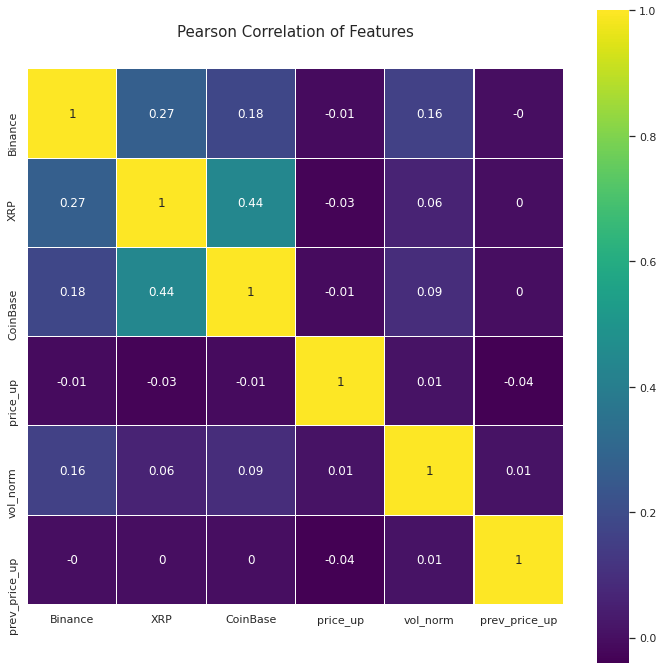

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

In [0]:
print(len(df)*0.15)
k = int(len(df)*0.15)
test = df[-k:]
train = df[:(len(df)-2*k)]
valid = df[(len(df)-2*k):(len(df)-k)]
print(train,valid,test)

3942.0
        Binance       XRP  CoinBase  price_up  vol_norm  prev_price_up
0     -1.713145 -0.984707 -1.706920       1.0 -0.612479            0.0
1     -1.713145  0.178764 -1.492779       1.0 -0.612678            0.0
2     -1.713145 -0.878937 -1.599849       0.0 -0.613113            1.0
3     -1.713145 -0.455857 -1.599849       1.0 -0.612657            1.0
4     -1.713145 -1.672213 -1.813990       1.0 -0.612505            0.0
...         ...       ...       ...       ...       ...            ...
18391  1.323712  0.707614 -0.529144       0.0 -0.483296            1.0
18392  1.209829  0.390304 -0.689749       0.0 -0.482960            1.0
18393  1.551476  0.020109 -0.475608       0.0 -0.491287            0.0
18394  1.513515  0.125879 -0.689749       0.0 -0.333136            0.0
18395  1.095947  0.813384 -0.582679       1.0 -0.441862            0.0

[18396 rows x 6 columns]         Binance       XRP  CoinBase  price_up  vol_norm  prev_price_up
18396  0.982065  0.231649 -0.475608       0.

In [0]:
X_train = train.drop("price_up", axis=1) # Training & Validation data
Y_train = train["price_up"] 
X_val = valid.drop("price_up", axis=1) # Training & Validation data
Y_val = valid["price_up"] 
X_test = test.drop("price_up", axis=1) # Training & Validation data
Y_test = test["price_up"] 
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(18396, 5) (18396,)
(3942, 5) (3942,)
(3942, 5) (3942,)


In [0]:
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

0.0    9598
1.0    8798
Name: price_up, dtype: int64
0.0    2036
1.0    1906
Name: price_up, dtype: int64
0.0    2103
1.0    1838
Name: price_up, dtype: int64


In [0]:
#logistic regression 
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
Y_pred = logreg.predict(X_val)                               # predict
acc_logreg = sum(Y_pred == Y_val)/len(Y_val)*100                # evaluate

print('Logistic Regression using val set:', str(round(acc_logreg,2)),'%')
acc_log_2 = logreg.score(X_train, Y_train)                       # evaluate

print('Logistic Regression using training set:', str(round(acc_log_2*100,2)),'%')

Logistic Regression using val set: 52.36 %
Logistic Regression using training set: 52.34 %


In [0]:
#knn 
for a in range(1,100):
  knn = KNeighborsClassifier(n_neighbors = a)                  # instantiate
  knn.fit(X_train, Y_train)                                    # fit
  acc_knn = knn.score(X_val, Y_val)                            # predict + evaluate

  print(str(a)+'K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')

1K-Nearest Neighbors labeling accuracy: 50.48 %
2K-Nearest Neighbors labeling accuracy: 51.04 %
3K-Nearest Neighbors labeling accuracy: 50.3 %
4K-Nearest Neighbors labeling accuracy: 50.94 %
5K-Nearest Neighbors labeling accuracy: 50.03 %
6K-Nearest Neighbors labeling accuracy: 50.79 %
7K-Nearest Neighbors labeling accuracy: 50.58 %
8K-Nearest Neighbors labeling accuracy: 51.19 %
9K-Nearest Neighbors labeling accuracy: 50.76 %
10K-Nearest Neighbors labeling accuracy: 51.75 %
11K-Nearest Neighbors labeling accuracy: 51.62 %
12K-Nearest Neighbors labeling accuracy: 51.5 %
13K-Nearest Neighbors labeling accuracy: 51.5 %
14K-Nearest Neighbors labeling accuracy: 52.31 %
15K-Nearest Neighbors labeling accuracy: 51.75 %
16K-Nearest Neighbors labeling accuracy: 51.19 %
17K-Nearest Neighbors labeling accuracy: 51.4 %
18K-Nearest Neighbors labeling accuracy: 50.94 %
19K-Nearest Neighbors labeling accuracy: 50.84 %
20K-Nearest Neighbors labeling accuracy: 50.99 %
21K-Nearest Neighbors labeling ac

In [0]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 53.2 %


In [0]:
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_val, Y_val)              # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

Perceptron labeling accuracy: 49.57 %


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


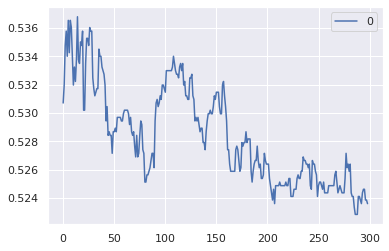

In [0]:
# XGBoost, same API as scikit-learn
acc_xgboost = []
for a in range(1,300):
  print(a)
  gradboost = xgb.XGBClassifier(n_estimators=a)             # instantiate
  gradboost.fit(X_train, Y_train)                              # fit
  acc_xgboost.append(gradboost.score(X_val, Y_val))                  # predict + evalute

acc_xgboost = pd.DataFrame(acc_xgboost)
acc_xgboost.plot()
print(max(acc_xgboost[0]))
print(acc_xgboost.idxmax())
print('XGBoost labeling accuracy:', str(round(max(acc_xgboost[0])*100,2)),'%')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.528158295281583
0    30
dtype: int64


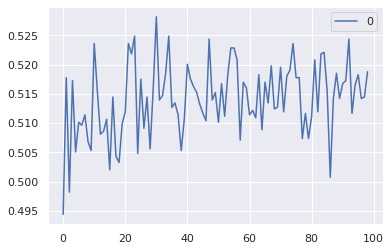

In [0]:
# Random Forest
acc_rf = []
for a in range(1,100):
  print(a)
  random_forest = RandomForestClassifier(n_estimators=a)   # instantiate
  random_forest.fit(X_train, Y_train)                         # fit
  acc_rf.append(random_forest.score(X_val, Y_val))                  # predict + evaluate

acc_rf = pd.DataFrame(acc_rf)
acc_rf.plot()
print(max(acc_rf[0]))
print(acc_rf.idxmax())
#print('Random Forest accuracy:', str(round(acc_rf*100,2)),'%')

Training accuracy Random Forest: 1.0


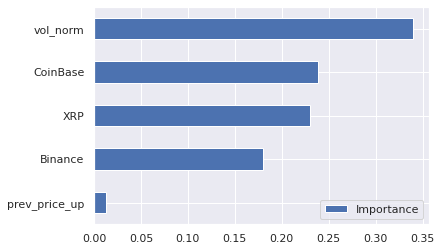

In [0]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

# Overfitting a looot 

In [0]:
# from datetime import datetime
# type(df2['date'])
df2['date'] = pd.to_datetime(df2['date'])
df2

,date,close,volumefrom,Binance,XRP,CoinBase
0,2017-01-01 00:00:00,0.006487,4342.13,0.0,37.0,22
1,2017-01-01 01:00:00,0.006498,3056.21,0.0,59.0,26
2,2017-01-01 02:00:00,0.006667,258.00,0.0,39.0,24
3,2017-01-01 03:00:00,0.006563,3194.77,0.0,47.0,24
4,2017-01-01 04:00:00,0.006597,4169.47,0.0,24.0,20
...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,0.190100,1835796.97,61.0,73.0,82
26276,2019-12-31 20:00:00,0.190200,2109093.29,58.0,71.0,75
26277,2019-12-31 21:00:00,0.190800,2267928.71,62.0,75.0,71
26278,2019-12-31 22:00:00,0.191900,2623716.02,55.0,70.0,74


In [0]:
# grouping by day and getting the average for each day 
df2 = df2.resample('D', on='date').mean()
df2

,close,volumefrom,Binance,XRP,CoinBase
date,,,,,
2017-01-01,0.006510,1.082510e+04,2.000000,38.625000,20.416667
2017-01-02,0.006342,2.932379e+04,0.000000,45.625000,29.291667
2017-01-03,0.006368,8.058593e+04,2.291667,44.375000,28.833333
2017-01-04,0.006546,4.223395e+04,3.083333,50.833333,41.333333
2017-01-05,0.006146,4.109612e+05,2.416667,55.083333,43.375000
...,...,...,...,...,...
2019-12-27,0.188617,2.907153e+06,76.708333,68.458333,66.083333
2019-12-28,0.192746,2.444936e+06,74.416667,74.166667,65.833333
2019-12-29,0.194279,2.225099e+06,71.875000,77.125000,69.541667


In [0]:
print(Ripple.isnull().sum())
print(Coinbase.isnull().sum())
Ripple['Ripple_new_sub'] = Ripple['subscriber_count']
Coinbase['Coinbase_new_sub'] = Coinbase['subscriber_count']
for i in range(1,len(Ripple)):
  Ripple['Ripple_new_sub'][i] = Ripple['subscriber_count'][i]- Ripple['subscriber_count'][i-1]

for i in range(1,len(Coinbase)):
  Coinbase['Coinbase_new_sub'][i] = Coinbase['subscriber_count'][i]-Coinbase['subscriber_count'][i-1]

Ripple['date'] = pd.to_datetime(Ripple['date'])
Coinbase['date'] = pd.to_datetime(Coinbase['date'])
Coinbase

Unnamed: 0          0
date                0
subscriber_count    0
dtype: int64
Unnamed: 0          0
date                0
subscriber_count    0
dtype: int64


,Unnamed: 0,date,subscriber_count,Coinbase_new_sub
0,0,2013-03-21,2,2
1,1,2013-03-22,2,0
2,2,2013-03-23,2,0
3,3,2013-03-24,2,0
4,4,2013-03-25,2,0
...,...,...,...,...
2557,2557,2020-03-16,46725,18
2558,2558,2020-03-17,46759,34
2559,2559,2020-03-18,46775,16
2560,2560,2020-03-19,46816,41


,date,wiki_ripple,Bitcoin,Ethereum,wiki_coinbase,wiki_binance,Cryptocurrency
0,2016-01-01,41.0,6917.0,350.0,157.0,NaN,722.0
1,2016-01-02,39.0,8377.0,455.0,168.0,NaN,831.0
2,2016-01-03,52.0,10766.0,529.0,168.0,NaN,826.0
3,2016-01-04,65.0,10785.0,712.0,193.0,NaN,1124.0
4,2016-01-05,39.0,10522.0,702.0,325.0,NaN,1190.0
...,...,...,...,...,...,...,...
1536,2020-03-16,49.0,7018.0,4085.0,824.0,1434.0,4240.0
1537,2020-03-17,52.0,6889.0,1731.0,757.0,1425.0,4463.0
1538,2020-03-18,42.0,6672.0,1649.0,766.0,1766.0,5180.0
1539,2020-03-19,39.0,6983.0,1568.0,834.0,1255.0,4781.0


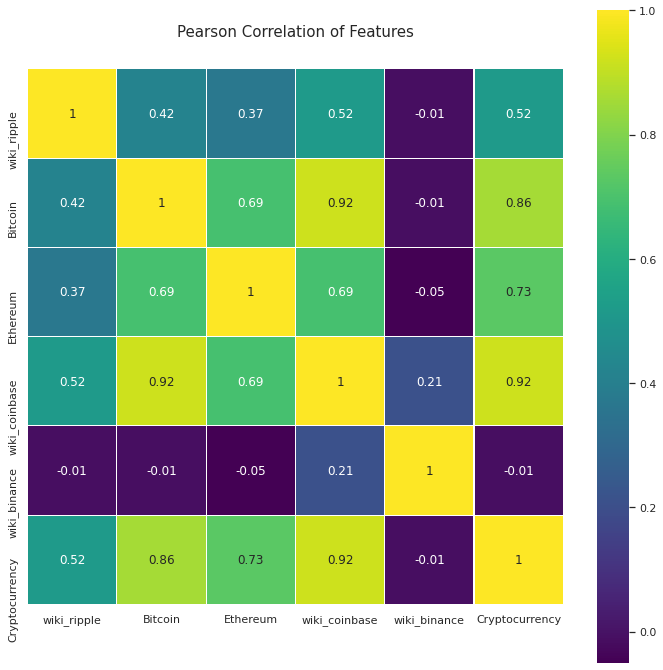

In [0]:
wiki_views = wiki_views.rename(columns={'Unnamed: 0':'date', 'Ripple' : 'wiki_ripple', 'Coinbase':'wiki_coinbase', 'Binance':'wiki_binance'})
wiki_views['date'] = pd.to_datetime(wiki_views['date'])
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(wiki_views.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);
wiki_views

In [0]:
XRP_coimetrics_data['date'] = pd.to_datetime(XRP_coimetrics_data['date'])
XRP_coimetrics_data

,Unnamed: 0,date,active_adress,FeeMeanXRP,FeeMedXRP,FeeTotXRP,PriceBTC,PriceUSD,ROI1yr,ROI30d,transactions_count,XRPAdj
0,1461,2017-01-01,1279,0.005988,0.000150,4999.385672,0.000006,0.006308,3.414060,-4.598658,834832,2467.130626
1,1462,2017-01-02,1633,0.007085,0.000150,6403.432368,0.000006,0.006270,5.867797,-4.066500,903815,2407.603861
2,1463,2017-01-03,1913,0.007513,0.000165,6292.742040,0.000006,0.006424,7.643177,-0.127838,837562,26.640669
3,1464,2017-01-04,1984,0.017283,0.000150,18423.908762,0.000006,0.006479,7.043325,1.578541,1066033,1147.530401
4,1465,2017-01-05,2436,0.028933,0.000150,33362.939893,0.000006,0.006193,4.284547,-7.867746,1153121,475.006288
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2649,2020-04-03,5383,0.000699,0.000012,617.033498,0.000027,0.179431,-45.829767,-23.484489,883075,134.533875
1189,2650,2020-04-04,4642,0.000542,0.000012,481.312322,0.000026,0.181335,-50.097362,-24.113112,888736,244.264233
1190,2651,2020-04-05,4430,0.000524,0.000012,461.155950,0.000026,0.179386,-49.177926,-26.569213,880811,408.263420
1191,2652,2020-04-06,5958,0.000671,0.000012,644.845275,0.000027,0.196956,-45.578377,-16.850623,961497,112.787252


In [0]:
df2 = df2.merge(Ripple[['date', 'Ripple_new_sub']], how= 'left' ,left_on=['date'],right_on=['date'] )
df2 = df2.merge(Coinbase[['date', 'Coinbase_new_sub']], how= 'left' ,left_on=['date'],right_on=['date'] )
df2 = df2.merge(wiki_views[['date', 'wiki_ripple', 'wiki_coinbase']], how= 'left' ,left_on=['date'],right_on=['date'] )
df2 = df2.merge(XRP_coimetrics_data[['date', 'active_adress', 'FeeMeanXRP', 'transactions_count', 'ROI30d']], how= 'left' ,left_on=['date'],right_on=['date'] )
#df2['close'] = df2['PriceUSD']
df3 = df2.copy()
df3 = df3.merge(XRP_coimetrics_data[['date', 'PriceUSD']], how= 'left' ,left_on=['date'],right_on=['date'] )
#df2 = df2.drop('PriceUSD', axis =1)
df2

,date,close,volumefrom,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d
0,2017-01-01,0.006510,1.082510e+04,2.000000,38.625000,20.416667,2,2,43.0,315.0,1279,0.005988,834832,-4.598658
1,2017-01-02,0.006342,2.932379e+04,0.000000,45.625000,29.291667,2,5,68.0,535.0,1633,0.007085,903815,-4.066500
2,2017-01-03,0.006368,8.058593e+04,2.291667,44.375000,28.833333,4,5,62.0,495.0,1913,0.007513,837562,-0.127838
3,2017-01-04,0.006546,4.223395e+04,3.083333,50.833333,41.333333,2,11,53.0,538.0,1984,0.017283,1066033,1.578541
4,2017-01-05,0.006146,4.109612e+05,2.416667,55.083333,43.375000,5,16,66.0,547.0,2436,0.028933,1153121,-7.867746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2019-12-27,0.188617,2.907153e+06,76.708333,68.458333,66.083333,26,16,50.0,541.0,3936,0.005699,1062464,-15.590821
1094,2019-12-28,0.192746,2.444936e+06,74.416667,74.166667,65.833333,20,8,51.0,543.0,3680,0.000828,1147052,-13.791146
1095,2019-12-29,0.194279,2.225099e+06,71.875000,77.125000,69.541667,22,3,55.0,499.0,3542,0.000695,1188354,-14.577023
1096,2019-12-30,0.194254,3.128968e+06,73.625000,78.875000,74.666667,12,10,34.0,585.0,4179,0.000706,1140554,-14.747366


In [0]:
# filling nans with mean of column
print(df2.info())
df2 = df2.fillna(df2.mean())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 1097
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1098 non-null   datetime64[ns]
 1   close               1098 non-null   float64       
 2   volumefrom          1098 non-null   float64       
 3   Binance             1029 non-null   float64       
 4   XRP                 1092 non-null   float64       
 5   CoinBase            1098 non-null   float64       
 6   Ripple_new_sub      1098 non-null   int64         
 7   Coinbase_new_sub    1098 non-null   int64         
 8   wiki_ripple         1098 non-null   float64       
 9   wiki_coinbase       1098 non-null   float64       
 10  active_adress       1098 non-null   int64         
 11  FeeMeanXRP          1098 non-null   float64       
 12  transactions_count  1098 non-null   int64         
 13  ROI30d              1098 non-null   float64     

In [0]:
# we will be predicting price up or price down 
df2['price_up'] = df2['close']
df2['price_up'][0] = 0
for i in range(1,len(df2)):
  if df2['close'][i]>df2['close'][i-1]:
    df2['price_up'][i]=int(1)
  else:
    df2['price_up'][i]=int(0)
df2

,date,close,volumefrom,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d,price_up
0,2017-01-01,0.006510,1.082510e+04,2.000000,38.625000,20.416667,2,2,43.0,315.0,1279,0.005988,834832,-4.598658,0.0
1,2017-01-02,0.006342,2.932379e+04,0.000000,45.625000,29.291667,2,5,68.0,535.0,1633,0.007085,903815,-4.066500,0.0
2,2017-01-03,0.006368,8.058593e+04,2.291667,44.375000,28.833333,4,5,62.0,495.0,1913,0.007513,837562,-0.127838,1.0
3,2017-01-04,0.006546,4.223395e+04,3.083333,50.833333,41.333333,2,11,53.0,538.0,1984,0.017283,1066033,1.578541,1.0
4,2017-01-05,0.006146,4.109612e+05,2.416667,55.083333,43.375000,5,16,66.0,547.0,2436,0.028933,1153121,-7.867746,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2019-12-27,0.188617,2.907153e+06,76.708333,68.458333,66.083333,26,16,50.0,541.0,3936,0.005699,1062464,-15.590821,0.0
1094,2019-12-28,0.192746,2.444936e+06,74.416667,74.166667,65.833333,20,8,51.0,543.0,3680,0.000828,1147052,-13.791146,1.0
1095,2019-12-29,0.194279,2.225099e+06,71.875000,77.125000,69.541667,22,3,55.0,499.0,3542,0.000695,1188354,-14.577023,1.0
1096,2019-12-30,0.194254,3.128968e+06,73.625000,78.875000,74.666667,12,10,34.0,585.0,4179,0.000706,1140554,-14.747366,0.0


In [0]:
df2['vol_norm']=(df2['volumefrom']-df2['volumefrom'].mean())/df2['volumefrom'].std()
df2 = df2.drop(['volumefrom', 'date', 'close'], axis=1)
df2

,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d,price_up,vol_norm
0,2.000000,38.625000,20.416667,2,2,43.0,315.0,1279,0.005988,834832,-4.598658,0.0,-0.861093
1,0.000000,45.625000,29.291667,2,5,68.0,535.0,1633,0.007085,903815,-4.066500,0.0,-0.857035
2,2.291667,44.375000,28.833333,4,5,62.0,495.0,1913,0.007513,837562,-0.127838,1.0,-0.845789
3,3.083333,50.833333,41.333333,2,11,53.0,538.0,1984,0.017283,1066033,1.578541,1.0,-0.854203
4,2.416667,55.083333,43.375000,5,16,66.0,547.0,2436,0.028933,1153121,-7.867746,0.0,-0.773310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,76.708333,68.458333,66.083333,26,16,50.0,541.0,3936,0.005699,1062464,-15.590821,0.0,-0.225685
1094,74.416667,74.166667,65.833333,20,8,51.0,543.0,3680,0.000828,1147052,-13.791146,1.0,-0.327088
1095,71.875000,77.125000,69.541667,22,3,55.0,499.0,3542,0.000695,1188354,-14.577023,1.0,-0.375316
1096,73.625000,78.875000,74.666667,12,10,34.0,585.0,4179,0.000706,1140554,-14.747366,0.0,-0.177022


In [0]:
#normalizing every column
columns = df2.drop('price_up',axis=1).columns
for col in columns:
  df2[col]=(df2[col]-df2[col].mean())/df2[col].std()
df2

,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d,price_up,vol_norm
0,-1.764005,-1.053012,-2.277417,-0.299630,-0.325652,-0.412065,-0.579290,-0.827016,-0.043040,0.068239,-0.282119,0.0,-0.861093
1,-1.846009,-0.618007,-1.671657,-0.299630,-0.299764,-0.274888,-0.428433,-0.782079,-0.027429,0.226462,-0.278793,0.0,-0.857035
2,-1.752046,-0.695686,-1.702940,-0.296410,-0.299764,-0.307811,-0.455861,-0.746536,-0.021332,0.074500,-0.254173,1.0,-0.845789
3,-1.719586,-0.294343,-0.849757,-0.299630,-0.247988,-0.357195,-0.426376,-0.737523,0.117767,0.598534,-0.243507,1.0,-0.854203
4,-1.746921,-0.030232,-0.710404,-0.294800,-0.204841,-0.285863,-0.420204,-0.680145,0.283642,0.798284,-0.302553,0.0,-0.773310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1.299193,0.800938,0.839547,-0.260987,-0.204841,-0.373656,-0.424318,-0.489733,-0.047165,0.590348,-0.350828,0.0,-0.225685
1094,1.205230,1.155674,0.822483,-0.270648,-0.273876,-0.368169,-0.422947,-0.522230,-0.116512,0.784364,-0.339579,1.0,-0.327088
1095,1.101017,1.339515,1.075594,-0.267428,-0.317022,-0.346220,-0.453119,-0.539748,-0.118412,0.879096,-0.344491,1.0,-0.375316
1096,1.172770,1.448267,1.425399,-0.283529,-0.256617,-0.461449,-0.394147,-0.458886,-0.118247,0.769460,-0.345556,0.0,-0.177022


In [0]:
df2['prev_price_up'] = df2['price_up'].shift(+1)
df2['price_up'] = df2['price_up'].shift(-1)
df2['price_up'][len(df2)]= 0
df2['prev_price_up'][0] = 0
df2 

,Binance,XRP,CoinBase,Ripple_new_sub,Coinbase_new_sub,wiki_ripple,wiki_coinbase,active_adress,FeeMeanXRP,transactions_count,ROI30d,price_up,vol_norm,prev_price_up
0,-1.764005,-1.053012,-2.277417,-0.299630,-0.325652,-0.412065,-0.579290,-0.827016,-0.043040,0.068239,-0.282119,0.0,-0.861093,0.0
1,-1.846009,-0.618007,-1.671657,-0.299630,-0.299764,-0.274888,-0.428433,-0.782079,-0.027429,0.226462,-0.278793,1.0,-0.857035,0.0
2,-1.752046,-0.695686,-1.702940,-0.296410,-0.299764,-0.307811,-0.455861,-0.746536,-0.021332,0.074500,-0.254173,1.0,-0.845789,0.0
3,-1.719586,-0.294343,-0.849757,-0.299630,-0.247988,-0.357195,-0.426376,-0.737523,0.117767,0.598534,-0.243507,0.0,-0.854203,1.0
4,-1.746921,-0.030232,-0.710404,-0.294800,-0.204841,-0.285863,-0.420204,-0.680145,0.283642,0.798284,-0.302553,1.0,-0.773310,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1.299193,0.800938,0.839547,-0.260987,-0.204841,-0.373656,-0.424318,-0.489733,-0.047165,0.590348,-0.350828,1.0,-0.225685,1.0
1094,1.205230,1.155674,0.822483,-0.270648,-0.273876,-0.368169,-0.422947,-0.522230,-0.116512,0.784364,-0.339579,1.0,-0.327088,0.0
1095,1.101017,1.339515,1.075594,-0.267428,-0.317022,-0.346220,-0.453119,-0.539748,-0.118412,0.879096,-0.344491,0.0,-0.375316,1.0
1096,1.172770,1.448267,1.425399,-0.283529,-0.256617,-0.461449,-0.394147,-0.458886,-0.118247,0.769460,-0.345556,0.0,-0.177022,1.0


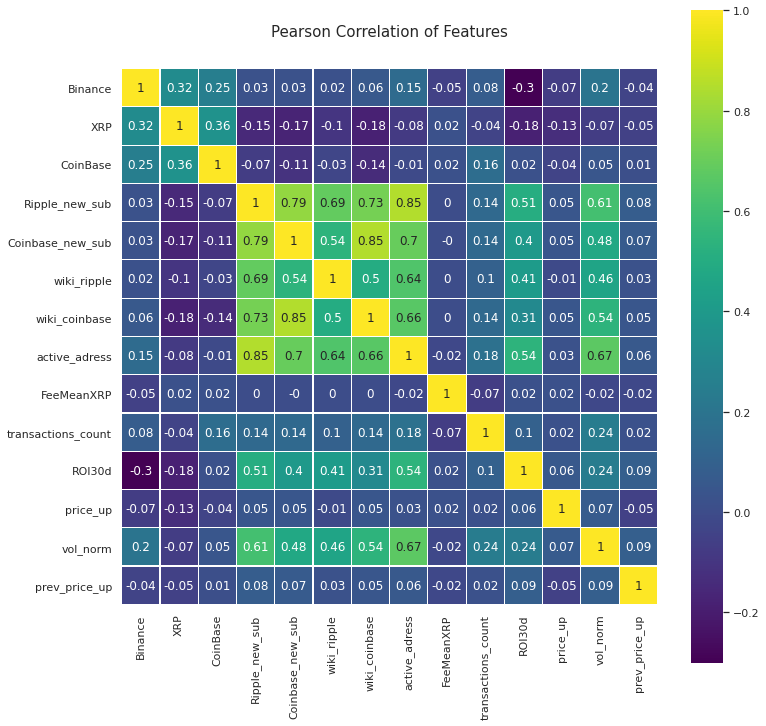

In [0]:
# correlation
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sn = sns.heatmap(df2.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);
sn.figure.savefig("correlation.png")

In [0]:
# train val test
print(len(df2)*0.15)
k = int(len(df2)*0.15)
test = df2[-k:]
train = df2[:(len(df2)-2*k)]
valid = df2[(len(df2)-2*k):(len(df2)-k)]
print(train,valid,test)


164.7
      Binance       XRP  CoinBase  ...  price_up  vol_norm  prev_price_up
0   -1.764005 -1.053012 -2.277417  ...       0.0 -0.861093            0.0
1   -1.846009 -0.618007 -1.671657  ...       1.0 -0.857035            0.0
2   -1.752046 -0.695686 -1.702940  ...       1.0 -0.845789            0.0
3   -1.719586 -0.294343 -0.849757  ...       0.0 -0.854203            1.0
4   -1.746921 -0.030232 -0.710404  ...       1.0 -0.773310            1.0
..        ...       ...       ...  ...       ...       ...            ...
765 -0.098295 -1.231675 -0.056296  ...       0.0 -0.526490            0.0
766  0.417648  0.280485 -0.261060  ...       0.0 -0.547458            1.0
767  0.865254  0.839778  0.105809  ...       0.0 -0.632255            0.0
768  1.360696  1.106477  0.634783  ...       0.0 -0.669246            0.0
769  1.060014  0.987368  0.492585  ...       1.0 -0.450943            0.0

[770 rows x 14 columns]       Binance       XRP  CoinBase  ...  price_up  vol_norm  prev_price_up
770  0.

In [0]:
X_train = train.drop("price_up", axis=1) # Training & Validation data
Y_train = train["price_up"] 
X_val = valid.drop("price_up", axis=1) # Training & Validation data
Y_val = valid["price_up"] 
X_test = test.drop("price_up", axis=1) # Training & Validation data
Y_test = test["price_up"] 
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

(770, 13) (770,)
(164, 13) (164,)
(164, 13) (164,)
0.0    411
1.0    359
Name: price_up, dtype: int64
0.0    86
1.0    78
Name: price_up, dtype: int64
0.0    91
1.0    72
Name: price_up, dtype: int64


baseline = always predict the most occuring class on the training set --> 0 
# baseline accuracy on val set = 86/(86+78) = 52.44%


In [0]:
#logistic regression 
logreg = LogisticRegression()                                # instantiate
logreg.fit(X_train, Y_train)                                 # fit
Y_pred = logreg.predict(X_val)                               # predict
acc_logreg = sum(Y_pred == Y_val)/len(Y_val)*100                # evaluate

print('Logistic Regression validation set:', str(round(acc_logreg,2)),'%')
acc_log_2 = logreg.score(X_train, Y_train)                       # evaluate

print('Logistic Regression on the training set:', str(round(acc_log_2*100,2)),'%')

Logistic Regression validation set: 51.83 %
Logistic Regression on the training set: 57.79 %


In [0]:
import statsmodels.api as sm
sm_model = sm.Logit(Y_train, sm.add_constant(X_train)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const                 0.549599
Binance               0.739472
XRP                   0.025833
CoinBase              0.848619
Ripple_new_sub        0.036396
Coinbase_new_sub      0.590876
wiki_ripple           0.173462
wiki_coinbase         0.670169
active_adress         0.009178
FeeMeanXRP            0.410269
transactions_count    0.294461
ROI30d                0.090863
vol_norm              0.003040
prev_price_up         0.131169
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               price_up   No. Observations:                  770
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                           13
Date:                Sun, 19 Apr 2020   Pseudo R-squ.:                 0.03854
Time:                        23:07:20   Log-Likelihood:                -511.46
converged:                       True   LL-Null:                       -531.97
Covariance Type:            nonrobust   LLR p-value:                 9.510e-05
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0655      0.110     -0.598      0.550      -0.280       0.149
Binance               -0.0301      0.091     -0.333      0.739      -0.208       0.148
XRP                   -0.1850      0.083     -2.229      0.026      -0.348      -0.022
CoinBase               0.0155      0.081      0.191      0.849      -0.144       0.175
Ripple_new_sub         0.5833      0.279      2.092      0.036       0.037       1.130
Coinbase_new_sub       0.0794      0.148      0.538      0.591      -0.210       0.369
wiki_ripple           -0.2199      0.162     -1.361      0.173      -0.537       0.097
wiki_coinbase         -0.0606      0.142     -0.426      0.670      -0.339       0.218
active_adress         -0.7126      0.274     -2.605      0.009      -1.249      -0.177
FeeMeanXRP             0.0568      0.069      0.823      0.410      -0.078       0.192
transactions_count     0.1751      0.167      1.048      0.294      -0.152       0.502
ROI30d                 0.1667      0.099      1.691      0.091      -0.027       0.360
vol_norm               0.3619      0.122      2.964      0.003       0.123       0.601
prev_price_up         -0.2276      0.151     -1.510      0.131      -0.523       0.068
======================================================================================
"""

0.6097560975609756
0    18
dtype: int64
K-Nearest Neighbors labeling accuracy: 60.98 %


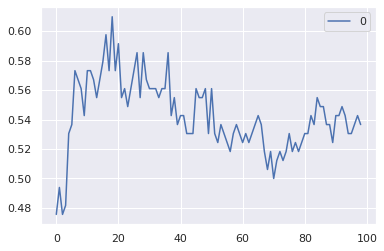

In [0]:
#knn 
acc_knn = []
for a in range(1,100):
  knn = KNeighborsClassifier(n_neighbors = a)                  # instantiate
  knn.fit(X_train, Y_train)                                    # fit
  acc_knn.append(knn.score(X_val, Y_val))                            # predict + evaluate

acc_knn = pd.DataFrame(acc_knn)
acc_knn.plot()
print(max(acc_knn[0]))
print(acc_knn.idxmax())
print('K-Nearest Neighbors labeling accuracy:', str(round(max(acc_knn[0])*100,2)),'%')

In [0]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 55.49 %


In [0]:
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_val, Y_val)              # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

Perceptron labeling accuracy: 46.34 %


0.5426829268292683
0    80
dtype: int64
XGBoost labeling accuracy: 54.27 %


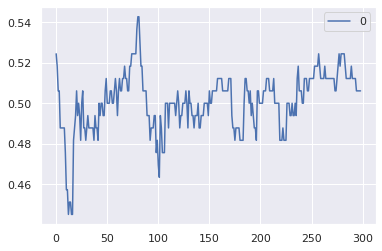

In [0]:
# XGBoost, same API as scikit-learn
acc_xgboost = []
for a in range(1,300):
  gradboost = xgb.XGBClassifier(n_estimators=a)             # instantiate
  gradboost.fit(X_train, Y_train)                              # fit
  acc_xgboost.append(gradboost.score(X_val, Y_val))                  # predict + evalute

acc_xgboost = pd.DataFrame(acc_xgboost)
acc_xgboost.plot()
print(max(acc_xgboost[0]))
print(acc_xgboost.idxmax())
print('XGBoost labeling accuracy:', str(round(max(acc_xgboost[0])*100,2)),'%')

In [0]:
# Random Forest with cross-validation
acc_rf = []
for i in range(1,500):
  np.random_seed = 42
  random_forest = RandomForestClassifier(n_estimators=i, random_state=42)   # instantiate
  random_forest.fit(X_train, Y_train)                         # fit
  acc_rf.append(random_forest.score(X_val, Y_val))                 # predict + evaluate

#print('Random Forest accuracy:', str(round(acc_rf*100,2)),'%')

0.5670731707317073


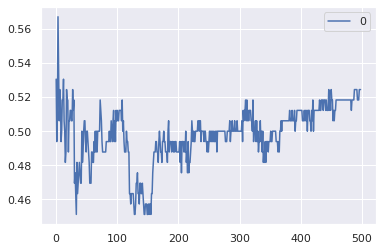

In [0]:
acc_rf = pd.DataFrame(acc_rf)
acc_rf.plot()
print(max(acc_rf[0]))

In [0]:
acc_rf.idxmax()

0    3
dtype: int64

Training accuracy Random Forest: 0.9142857142857143


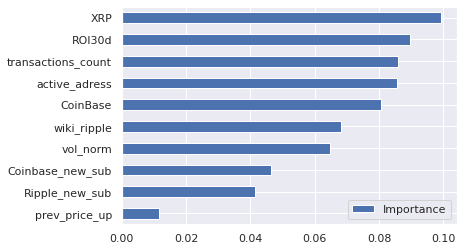

In [0]:
# Look at importnace of features for random forest

np.random_seed = 42
random_forest = RandomForestClassifier(n_estimators=3, random_state=42)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit


def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

# Looks like it's overfitting, strange cause the number of variables is not that big compared to the # of observations
# i would expect the other models to be overfitting as well, while by looking at the logistic regression model we notice it's not overfitting

In [0]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df= exog_df.fillna(exog_df.mean())
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

variance_inflation_factors(df2)

const                 2.915850
Binance               1.530808
XRP                   1.304312
CoinBase              1.286008
Ripple_new_sub        5.780831
Coinbase_new_sub      4.889467
wiki_ripple           1.963792
wiki_coinbase         4.218835
active_adress         5.459016
FeeMeanXRP            1.013307
transactions_count    1.110590
ROI30d                1.958471
price_up              1.036004
vol_norm              2.146345
prev_price_up         1.027645
Name: VIF, dtype: float64

# Dropping non-significant variables

In [0]:
XX_train = X_train.drop(['Binance', 'wiki_coinbase', 'FeeMeanXRP'], axis = 1)
XX_val = X_val.drop(['Binance', 'wiki_coinbase', 'FeeMeanXRP'], axis = 1)
XX_test = X_test.drop(['Binance', 'wiki_coinbase', 'FeeMeanXRP'], axis = 1)

0.6158536585365854
0    32
dtype: int64
K-Nearest Neighbors labeling accuracy: 61.59 %


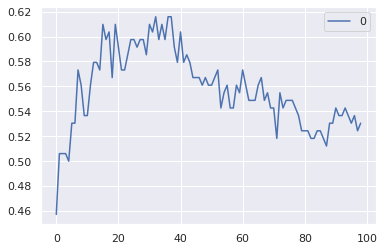

In [0]:
#knn 
acc_knn = []
for a in range(1,100):
  knn = KNeighborsClassifier(n_neighbors = a)                  # instantiate
  knn.fit(XX_train, Y_train)                                    # fit
  acc_knn.append(knn.score(XX_val, Y_val))                            # predict + evaluate

acc_knn = pd.DataFrame(acc_knn)
acc_knn.plot()
print(max(acc_knn[0]))
print(acc_knn.idxmax())
print('K-Nearest Neighbors labeling accuracy:', str(round(max(acc_knn[0])*100,2)),'%')

In [0]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(XX_train, Y_train)                                    # fit
acc_svc = svc.score(XX_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 56.71 %


In [0]:
# Random Forest with cross-validation
acc_rf = []
for i in range(1,500):
  np.random_seed = 42
  random_forest = RandomForestClassifier(n_estimators=i, random_state=42)   # instantiate
  random_forest.fit(XX_train, Y_train)                         # fit
  acc_rf.append(random_forest.score(XX_val, Y_val))                 # predict + evaluate

#print('Random Forest accuracy:', str(round(acc_rf*100,2)),'%')

0.5548780487804879
0    106
dtype: int64


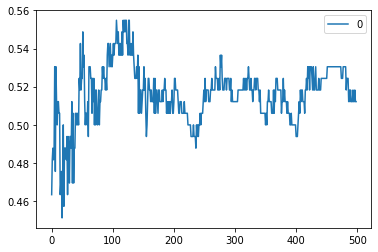

In [0]:
acc_rf = pd.DataFrame(acc_rf)
acc_rf.plot()
print(max(acc_rf[0]))
print(acc_rf.idxmax())

Training accuracy Random Forest: 1.0


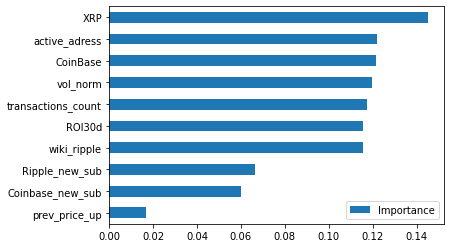

In [0]:
# Look at importnace of features for random forest

np.random_seed = 42
random_forest = RandomForestClassifier(n_estimators=106, random_state=42)   # instantiate
random_forest.fit(XX_train, Y_train)                         # fit


def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, XX_train, Y_train)

# Looks like it's overfitting, strange cause the number of variables is not that big compared to the # of observations
# i would expect the other models to be overfitting as well, while by looking at the logistic regression model we notice it's not overfitting

# Investment strategy 
I start with 100 XRP and 100 USD, I sell XRPs for dollars if I predict the price to go down tomorrow, I buy XRPs with dollars otherwise

In [0]:
valid['val_predictions'].value_counts()

0.0    131
1.0     33
Name: val_predictions, dtype: int64

In [0]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 33)                  # instantiate
knn.fit(XX_train, Y_train) 
val_predictions = knn.predict(XX_val)
test_predictions = knn.predict(XX_test)
print('test accuracy:', knn.score(XX_test[:-1], Y_test[:-1]))
print('CONFUSION MATRIX:')
print('         Predicted')
print('         down up')
print(' Actual')
c=confusion_matrix(Y_test[:-1], test_predictions[:-1])
print('  down  ',c[0])
print('  up    ',c[1])

test accuracy: 0.6073619631901841
CONFUSION MATRIX:
         Predicted
         down up
 Actual
  down   [75 16]
  up     [48 24]


In [0]:
df3 = df3[['date', 'close', 'PriceUSD']]
df3

,date,close,PriceUSD
0,2017-01-01,0.006510,0.006308
1,2017-01-02,0.006342,0.006270
2,2017-01-03,0.006368,0.006424
3,2017-01-04,0.006546,0.006479
4,2017-01-05,0.006146,0.006193
...,...,...,...
1093,2019-12-27,0.188617,0.189660
1094,2019-12-28,0.192746,0.193056
1095,2019-12-29,0.194279,0.196707
1096,2019-12-30,0.194254,0.192652


In [0]:
# train val test
print(len(df3)*0.15)
k = int(len(df3)*0.15)
test = df3[-k:]
train = df3[:(len(df3)-2*k)]
valid = df3[(len(df3)-2*k):(len(df3)-k)]
#print(train,valid,test)
valid['val_predictions'] = val_predictions
valid['Y_val'] = Y_val
valid.tail(20)
test['test_predictions'] = test_predictions
test['Y_test'] = Y_test
valid.tail(20)
test = test[:-1]
valid

164.7


,date,close,PriceUSD,val_predictions,Y_val
770,2019-02-07,0.291354,0.288250,0.0,1.0
771,2019-02-08,0.301388,0.308054,0.0,1.0
772,2019-02-09,0.311238,0.308793,0.0,0.0
773,2019-02-10,0.305400,0.306387,0.0,0.0
774,2019-02-11,0.303554,0.299149,0.0,0.0
...,...,...,...,...,...
929,2019-07-16,0.307463,0.296561,0.0,0.0
930,2019-07-17,0.306238,0.310105,1.0,1.0
931,2019-07-18,0.316567,0.322859,1.0,1.0
932,2019-07-19,0.317508,0.320317,0.0,1.0


# Validation trials

In [0]:
XRP = []
USD = []
XRP.append(200)
USD.append(200)
portfolio_value = []
portfolio_value.append(XRP[0]*valid['close'].iloc[0]+USD[0])
benchmark_portfolio = []
benchmark_portfolio.append(XRP[0]*valid['close'].iloc[len(valid)-1]+USD[0])

for i in range(0,len(valid)):
  if valid['val_predictions'].iloc[i] == 1.0:
    XRP.append(XRP[i]+1)
    USD.append(USD[i]-valid['close'].iloc[i])
    portfolio_value.append(XRP[i]*valid['close'].iloc[i]+USD[i])
    benchmark_portfolio.append(XRP[0]*valid['close'].iloc[len(valid)-1]+USD[0])
  else:
    XRP.append(XRP[i]-1)
    USD.append(USD[i]+valid['close'].iloc[i])
    portfolio_value.append(XRP[i]*valid['close'].iloc[i]+USD[i])
    benchmark_portfolio.append(XRP[0]*valid['close'].iloc[len(valid)-1]+USD[0])

results = pd.DataFrame()
results['XRP'] = XRP
results['USD'] = USD
results['portfolio_value'] = portfolio_value
results['benchmark_portfolio'] = benchmark_portfolio
results['index'] = results.index
results

,XRP,USD,portfolio_value,benchmark_portfolio,index
0,200,200.000000,258.270833,266.165833,0
1,199,200.291354,258.270833,266.165833,1
2,198,200.592742,260.267467,266.165833,2
3,197,200.903979,262.217767,266.165833,3
4,196,201.209379,261.067779,266.165833,4
...,...,...,...,...,...
160,102,233.989421,265.350596,266.165833,160
161,103,233.683183,265.225646,266.165833,161
162,104,233.366617,266.289550,266.165833,162
163,103,233.684125,266.387483,266.165833,163


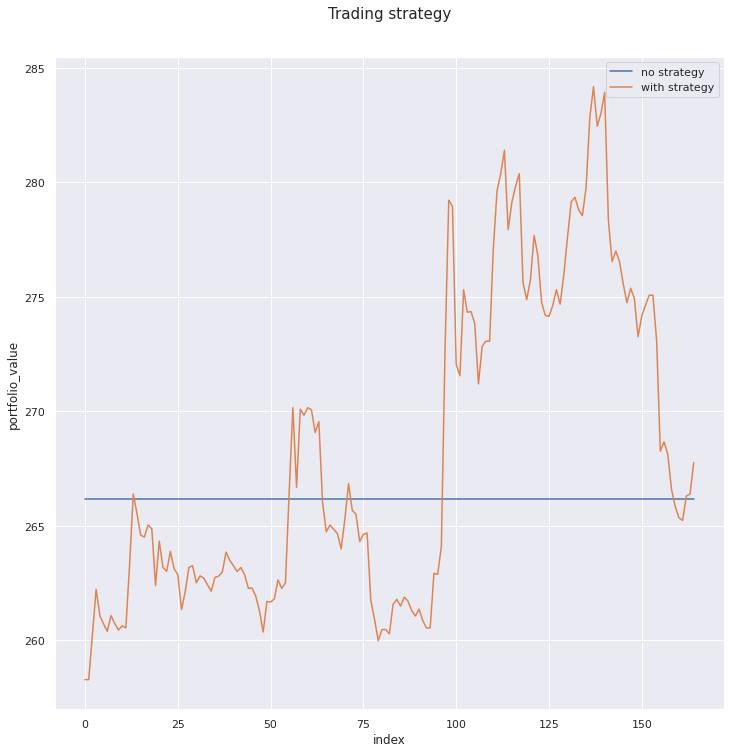

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title('Trading strategy', y=1.05, size=15)
ax2 = sns.lineplot(x='index', y="benchmark_portfolio", label = 'no strategy', data=results)
ax = sns.lineplot(x='index', y="portfolio_value", label = 'with strategy',data=results)
ax.legend()

ax.figure.savefig("validation.png")

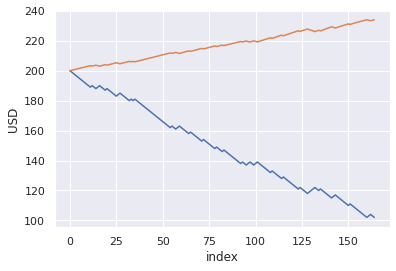

In [0]:
ax = sns.lineplot(x='index', y="XRP", data=results)
ax2 = sns.lineplot(x='index', y="USD", data=results)

# Test trials

In [0]:
XRP = []
USD = []
XRP.append(200)
USD.append(200)
portfolio_value = []
portfolio_value.append(XRP[0]*test['close'].iloc[0]+USD[0])
benchmark_portfolio = []
benchmark_portfolio.append(XRP[0]*test['close'].iloc[len(test)-1]+USD[0])

for i in range(0,len(test)):
  if test['test_predictions'].iloc[i] == 1.0:
    XRP.append(XRP[i]+1)
    USD.append(USD[i]-test['close'].iloc[i])
    portfolio_value.append(XRP[i]*test['close'].iloc[i]+USD[i])
    benchmark_portfolio.append(XRP[0]*test['close'].iloc[len(test)-1]+USD[0])
  else:
    XRP.append(XRP[i]-1)
    USD.append(USD[i]+test['close'].iloc[i])
    portfolio_value.append(XRP[i]*test['close'].iloc[i]+USD[i])
    benchmark_portfolio.append(XRP[0]*test['close'].iloc[len(test)-1]+USD[0])

results = pd.DataFrame()
results['XRP'] = XRP
results['USD'] = USD
results['portfolio_value'] = portfolio_value
results['benchmark_portfolio'] = benchmark_portfolio
results['index'] = results.index
results

,XRP,USD,portfolio_value,benchmark_portfolio,index
0,200,200.000000,265.725000,238.850833,0
1,199,200.328625,265.725000,238.850833,1
2,198,200.652471,264.773946,238.850833,2
3,197,200.965487,262.629771,238.850833,3
4,198,200.655075,262.116750,238.850833,4
...,...,...,...,...,...
159,121,220.895975,243.789679,238.850833,159
160,120,221.084592,243.718592,238.850833,160
161,119,221.277337,244.214092,238.850833,161
162,118,221.471617,244.396558,238.850833,162


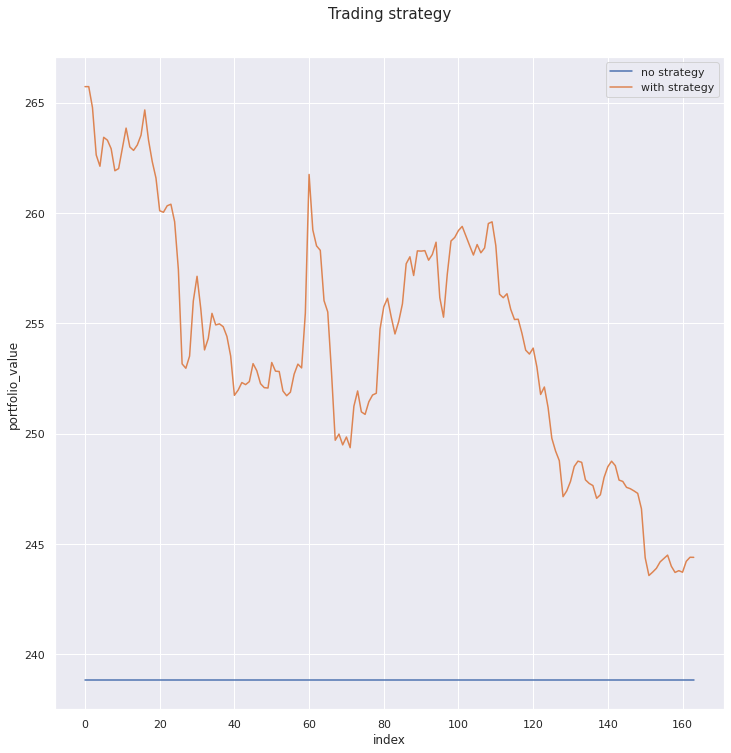

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title('Trading strategy', y=1.05, size=15)
ax2 = sns.lineplot(x='index', y="benchmark_portfolio", label = 'no strategy', data=results)
ax = sns.lineplot(x='index', y="portfolio_value", label = 'with strategy',data=results)
ax.legend()

ax.figure.savefig("test.png")

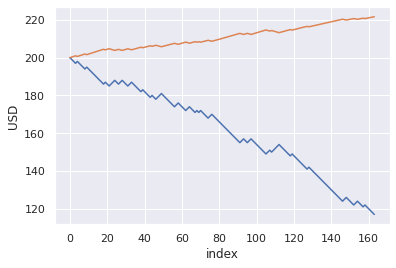

In [0]:
ax = sns.lineplot(x='index', y="XRP", data=results)
ax2 = sns.lineplot(x='index', y="USD", data=results)